<a href="https://colab.research.google.com/github/mixa15341/Deep_Learning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9F%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%BE%D0%B9_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_BatchNormalization()_%D0%B8_Dropout().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

## Задание 1. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout():

### 1.1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки:

*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [12]:
import numpy
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import backend as K

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


### 1.2. Визуализируйте несколько изображений из датасета:


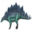

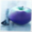

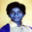

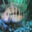

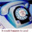

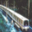

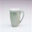

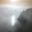

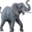

In [3]:
for i in range(1, 10):
    cv2_imshow(x_train[i])

### 1.3. Произведите нормализацию данных:

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

### 1.4. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout():

Имя данной модели: model_1

In [9]:
# Create a sequential model
model_1 = Sequential()

# Add convolutional layers
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_1.add(Conv2D(32, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_1.add(Flatten())

# Add fully connected layers
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(100, activation='softmax'))
model_1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [7]:
batch_size = 128
epochs = 5

In [10]:
model_1_history = model_1.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 8s 17ms/step - loss: 3.7061 - accuracy: 0.1404 - val_loss: 3.1548 - val_accuracy: 0.2314
Epoch 2/5
391/391 [==============================] - 6s 16ms/step - loss: 2.8764 - accuracy: 0.2875 - val_loss: 2.7335 - val_accuracy: 0.3247
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 2.4547 - accuracy: 0.3733 - val_loss: 2.5388 - val_accuracy: 0.3578
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 2.1278 - accuracy: 0.4444 - val_loss: 2.4511 - val_accuracy: 0.3818
Epoch 5/5
391/391 [==============================] - 6s 14ms/step - loss: 1.8448 - accuracy: 0.5067 - val_loss: 2.4363 - val_accuracy: 0.3968


Обучите созданную модель

In [ ]:
# Ваш код #

### 1.5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization():

Имя данной модели: model_2

In [13]:
# Create a sequential model
model_2 = Sequential()

# Add convolutional layers
model_2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_2.add(Flatten())

# Add fully connected layers
model_2.add(BatchNormalization())
model_2.add(Dense(512, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dense(100, activation='softmax'))
model_2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [15]:
model_2_history = model_2.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 8s 13ms/step - loss: 3.4205 - accuracy: 0.2056 - val_loss: 3.4013 - val_accuracy: 0.2067
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 2.4789 - accuracy: 0.3765 - val_loss: 2.6179 - val_accuracy: 0.3532
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 1.9649 - accuracy: 0.4868 - val_loss: 2.5650 - val_accuracy: 0.3811
Epoch 4/5
391/391 [==============================] - 6s 16ms/step - loss: 1.5740 - accuracy: 0.5780 - val_loss: 2.4478 - val_accuracy: 0.4125
Epoch 5/5
391/391 [==============================] - 6s 14ms/step - loss: 1.2168 - accuracy: 0.6699 - val_loss: 2.7177 - val_accuracy: 0.3943


Обучите созданную модель

In [ ]:
# Ваш код #

### 1.6. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout():

Имя данной модели: model_3

In [23]:
# Create a sequential model
model_3 = Sequential()

# Add convolutional layers
model_3.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_3.add(Conv2D(32, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(Conv2D(64, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# Flatten the feature maps
model_3.add(Flatten())

# Add fully connected layers
model_3.add(Dense(512, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100, activation='softmax'))
model_3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [21]:
model_3_history = model_3.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 8s 16ms/step - loss: 4.1094 - accuracy: 0.0718 - val_loss: 3.4965 - val_accuracy: 0.1722
Epoch 2/5
391/391 [==============================] - 5s 14ms/step - loss: 3.4235 - accuracy: 0.1807 - val_loss: 3.0654 - val_accuracy: 0.2630
Epoch 3/5
391/391 [==============================] - 6s 16ms/step - loss: 3.0730 - accuracy: 0.2459 - val_loss: 2.7608 - val_accuracy: 0.3164
Epoch 4/5
391/391 [==============================] - 7s 17ms/step - loss: 2.8424 - accuracy: 0.2882 - val_loss: 2.6226 - val_accuracy: 0.3413
Epoch 5/5
391/391 [==============================] - 7s 17ms/step - loss: 2.6756 - accuracy: 0.3216 - val_loss: 2.4691 - val_accuracy: 0.3697


### 1.7. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [24]:
# Create a sequential model
model_4 = Sequential()

# Add convolutional layers
model_4.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model_4.add(Conv2D(32, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(Conv2D(64, (3, 3), activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

# Flatten the feature maps
model_4.add(Flatten())

# Add fully connected layers
model_4.add(BatchNormalization())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(BatchNormalization())
model_4.add(Dense(100, activation='softmax'))
model_4.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

Обучите созданную модель

In [26]:
model_4_history = model_4.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 9s 16ms/step - loss: 4.1257 - accuracy: 0.0946 - val_loss: 3.8007 - val_accuracy: 0.1300
Epoch 2/5
391/391 [==============================] - 6s 14ms/step - loss: 3.3024 - accuracy: 0.2091 - val_loss: 2.9148 - val_accuracy: 0.2797
Epoch 3/5
391/391 [==============================] - 6s 15ms/step - loss: 2.9180 - accuracy: 0.2800 - val_loss: 2.7010 - val_accuracy: 0.3321
Epoch 4/5
391/391 [==============================] - 6s 14ms/step - loss: 2.6588 - accuracy: 0.3267 - val_loss: 2.5003 - val_accuracy: 0.3658
Epoch 5/5
391/391 [==============================] - 6s 16ms/step - loss: 2.4794 - accuracy: 0.3599 - val_loss: 2.3560 - val_accuracy: 0.3976


### Задание 1.8. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель:

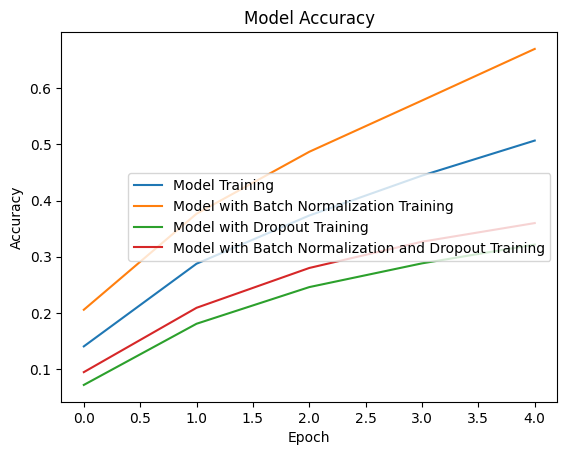

In [29]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_3_history.history['accuracy'])
plt.plot(model_4_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model Training','Model with Batch Normalization Training',
            'Model with Dropout Training', 'Model with Batch Normalization and Dropout Training'],
           loc='center right')

Ваши выводы

Ваш итог

### 1.9. Визуализируйте карты активации модели с BatchNorm() и Dropout(),отдельно по 5 классам (на Ваш выбор):

In [ ]:
# Ваш код #

## Задание 2. Загрузите Ваш датасет из предыдущей работы. Разделите его на обучающую и тестовую выборки. Обучите модель классификации с применением BatchNorm() и Dropout(). Сравните точность с моделями, обученными Вами ранее. Визуализируйте карты активаций.

In [ ]:
# Ваш код #